In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Pretty display for notebooks
%matplotlib inline

In [37]:
#Parameters for this dataset

data_directory = "./data/"
out_directory = "./out/"

file_train = "train.csv"
file_test = "test.csv"

#Open data file
data_train_original = pd.read_csv(data_directory + file_train)
data_test_original = pd.read_csv(data_directory + file_test)

# ***Explore***

In [3]:
data_train_ex = data_train_original.copy()
data_test_ex = data_test_original.copy()

pd.set_option('display.max_columns', 500)

#get list of categorical columns
categorical_cols = data_train_ex.columns[data_train_ex.dtypes == 'object']

#get list of numerical columns
numerical_cols = data_train_ex.columns[~(data_train_ex.dtypes == 'object')]

In [4]:
#Display the first few records
display(data_train_ex.head(n=5))

data_train_ex.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [152]:
data_train_ex['MoSold'].value_counts(dropna=False)

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

## Things to do

maintain alley column and have a missing or not column and 2 columns for the 2 values
MSSubclass (numerical) should be made categorical
LotShape: LabelEncoder: Reg, IR1, IR2, IR3
LandSlope: LabelEncoder: Gtl, Mod, Sev
ExterQual and ExterCond LabelEncoder: Ex, Gd, TA, Fa, Po
BsmtQual, BsmtCond: LabelEncoder: Ex, Gd, TA, Fa, Po (Na=No basement)
BsmtExposure: LabelEncoder: Gd, Av, Mn, No, (Na=No basement)
BsmtFinType1,BsmtFinType2: LabelEncoder: GLQ, ALQ, BLQ, Rec, LwQ, Unf, (Na=No basement)
HeatingQC: Ex, Gd, TA, Fa, Po
KitchenQual Ex, Gd, TA, Fa, Po
Functional: Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal
FireplaceQu: Ex Gd, TA, Fa, Po, NA=No Fireplace
GarageFinish: Fin, RFn,Unf.
GarageQual, GarageCond: Ex, Gd, TA, Fa, Po, NA=No Garage
PoolQC:  Ex, Gd, TA, Fa, Po, NA=No Pool
Fence is a bit messsed up but worth taking fence or no fence from it.
Remove MiscVal
MoSold (numerical) should be made categroical

Note:
currently removing ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' ] due to number of missing values and 'MiscVal' due to it being full of garbage.

As a result 'FireplaceQu' and 'PoolQC' are not being included in the list of categorical columns to be converted to categorical ordinal.



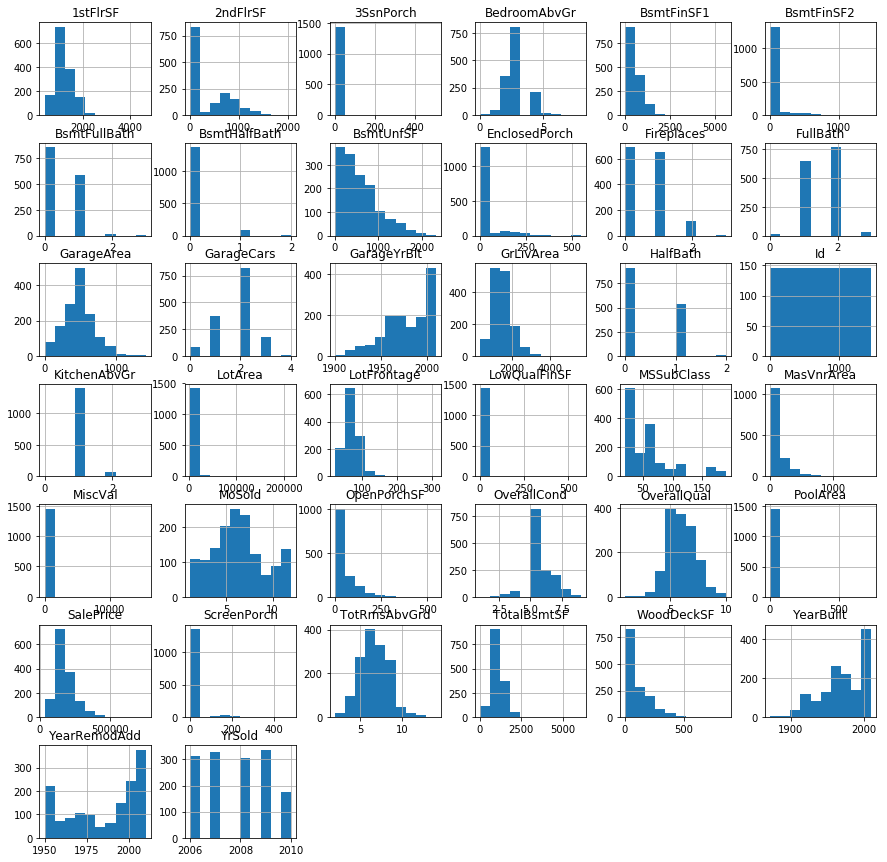

In [104]:
data_train_ex[numerical_cols].hist(figsize=(15,15));

In [5]:
#Check for mixed type variabes

for col_name, column in data_train_ex.iteritems():
    if column.get_dtype_counts().nunique()>1:
        print("Mixed type!:", col_name, column.dtypes )

In [4]:
#Summarise missing values

columns_with_missing_data_train = data_train_ex[[col for col in data_train_ex if (data_train_ex[col].isnull().sum() > 0)]]
columns_with_missing_data_test = data_test_ex[[col for col in data_test_ex if (data_test_ex[col].isnull().sum() > 0)]]

print((columns_with_missing_data_train.isnull().sum()/len(columns_with_missing_data_train.index))*100)
print((columns_with_missing_data_test.isnull().sum()/len(columns_with_missing_data_test.index))*100)


LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.1370

In [88]:
#Check for skewed distributions
plt.figure()

for col_name, column in data_train.iteritems():
        if column.dtype in ['int64', 'float64']:
            print(col_name)
            data_train[col_name].hist(bins=100)
            plt.title(col_name)
            plt.figure()

NameError: name 'data_train' is not defined

<Figure size 432x288 with 0 Axes>

# ***Transform***

In [90]:
data_train_transform = data_train_original.copy()
data_test_transform = data_test_original.copy()

# Split the data into features and target label
name_of_dependent_variable = "SalePrice"

data_train_X_trans = data_train_transform.drop(name_of_dependent_variable, axis = 1)
data_train_y_trans = data_train_transform[name_of_dependent_variable]

data_test_X_trans = data_test_transform

In [91]:
print(data_train_X_trans.shape)
print(data_test_X_trans.shape)
data_train_X_trans.head(2)

(1460, 80)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [23]:
data_train_clean.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500


In [22]:
#Impute values for some columns with a lot of missing data.

def impute_by_regression(data, column, model):
    """fill in misssing values of a column by means of regression"""

    data_local = data.copy()
    data_train = data_local[~data_local[column].isnull()].copy()
    data_test = data_local[data_local[column].isnull()].copy()
    
    data_train_X = data_train.drop([column], axis=1)
    data_train_y = data_train[column]
    data_test_X = data_test.drop([column], axis=1)

    fitted_model = model.fit(data_train_X, data_train_y)

    predictions = fitted_model.predict(data_test_X)

    #Put results back into the input data
    data_test.drop([column], axis=1, inplace=True)
    data_test[column] = predictions
    frames = [data_test, data_train]
    data_combined = pd.concat(frames).sort_index()

    return data_combined[column]

from sklearn.linear_model import LinearRegression

#Impute by linear regression the 'LotFrontage' column
remove_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']
data_train_clean = clean(data_train_original, remove_columns, inplace=False )
model_pipe = create_pipeline(LinearRegression())
impute_by_regression(data_train_clean, 'LotFrontage', model_pipe)

#need to create a generic clean function for this dataset
#First step: Move the deletion of columns until after the encoding if this is possible.
#Or move the removal of columns that may be imputed by regression to outside of the clean function

#Predict missing ages using regression
#imputed_age_column_train = impute_by_regression(data_train_age_regress, 'Age')
#imputed_age_column_test = impute_by_regression(data_test_age_regress, 'Age')


ValueError: 'Alley' is not in list

In [92]:
#Get rid of some columns with a lot of missing information
#'MiscVal' is looks like noise


def clean(data, remove_columns=None, inplace=False):
    """ Perform basic pre-processing on dataset before feeding data to model
    
     Args:
        data (dataframe): Series to be investigated.
        remove_columns (list): columns to be removed
    
    Returns:
        Cleaned dataset
    """   
    #removed columns from dataset
    if remove_columns is not None:
        if (inplace):
            data.drop(remove_columns, axis=1, inplace=True)
            return None
        else:
            new_data = data.drop(remove_columns, axis=1, inplace=False)
            return new_data
    else:
        return None
    
    
    

In [93]:
remove_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']
clean(data_train_X_trans, remove_columns, inplace=True)
clean(data_test_X_trans, remove_columns, inplace=True)

In [80]:
#Create Model pipeline to be used by our house price predictor and inputation steps

class OrdinalEncoder( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, ordinal_encoding):
        self.ordinal_encoding = ordinal_encoding
        pass
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        x_df = pd.DataFrame(X)
        for column,col_data in x_df.iteritems():
            x_df[column] = col_data.map(self.ordinal_encoding[column])
        X_array = x_df.values
        return X_array 

    
def create_column_transformer(column_types, ordinal_encoding):
    
    
    #---Categorical Ordinal Column---
    
    categorical_ordinal_steps = [('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
                                 ('labelencode', OrdinalEncoder(ordinal_encoding))]
    
    categorical_ordinal_pipe = Pipeline(categorical_ordinal_steps)
    categorical_ordinal_transformer = ('cat_ord', categorical_ordinal_pipe, categorical_ordinal_cols)
   
    #---Categorical Nominal Column---
    categorical_nominal_steps = [('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
                                 ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))]
    
    categorical_nominal_pipe = Pipeline(categorical_nominal_steps)
    categorical_nomimal_transformer = ('cat_nom', categorical_nominal_pipe, categorical_nominal_cols)

    #---Numerical Column---    
    numerical_steps = [('imputer', SimpleImputer(strategy='median'))]
    
    numerical_pipe = Pipeline(numerical_steps)
    numerical_transformer = ('numerical', numerical_pipe, numerical_cols)

    #---Join Numerical with Categorical---
    list_of_all_transformer_tuples=[categorical_ordinal_transformer, 
                                    categorical_nomimal_transformer, 
                                    numerical_transformer]
    transformer = ColumnTransformer(transformers=list_of_all_transformer_tuples)
    return transformer



def create_pipeline_for_regression(model, column_types, ordinal_encoding):
    
    pipe = Pipeline( steps = [('transformer', create_column_transformer(column_types, ordinal_encoding)),
                              ('model', model )])
    
    return pipe
    



In [81]:
def create_pipeline_for_kaggle_house_price_data(model):
    
    numerical_cols = data_train_X_trans.columns[~(data_train_X_trans.dtypes == 'object')]
    #set list of categorical columns for tranforming to Ordinal (label encoding)
    #Note: 'FireplaceQu' and 'PoolQC' should be included here if they are not being removed earlier for too many missing values
    categorical_ordinal_cols = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                'GarageFinish', 'GarageQual', 'GarageCond']
    #get list of categorical columns for one-hot encoding
    categorical_cols_all = data_train_X_trans.columns[data_train_X_trans.dtypes == 'object']
    categorical_nominal_cols = [col for col in categorical_cols_all if col not in categorical_ordinal_cols] #remove the ordinal_cols

    column_types = {'num_cols':     numerical_cols,
                    'cat_ord_cols': categorical_ordinal_cols,
                    'cat_nom_cols': categorical_nominal_cols}
    
    ordinal_encoding = [{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, #LotShape
            {'Gtl': 0, 'Mod': 1, 'Sev': 2}, #LandSlope
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #ExterQual
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #ExterCond
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #BsmtQual
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #BsmtCond
            {'Gd': 0 , 'Av': 1, 'Mn': 2, 'No': 3, 'MISSING': 4}, #BsmtExposure
            {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'MISSING': 6}, #BsmtFinType1
            {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'MISSING': 6}, #BsmtFinType2
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #HeatingQC
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #KitchenQual
            {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}, #Functional
            {'Fin': 0, 'RFn': 1,'Unf': 2, 'MISSING': 3}, #GarageFinish
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #GarageQual 
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}] #GarageCond

    pipe = create_pipeline_for_regression(model, column_types, ordinal_encoding)
    
    return pipe
    


In [94]:
#test pipeline creation

import ipdb
from sklearn.linear_model import LinearRegression
import xgboost as xgb



test_data = data_test_X_trans.copy()
model_XGB_tree = xgb.XGBRegressor(random_state=42)
pipe = create_pipeline_for_kaggle_house_price_data(model_XGB_tree)

print(pipe)

#ipdb.set_trace() #Note: this seems to need to beinside a function

pipe.fit(data_train_X_trans, data_train_y_trans)
pred_test = pipe.predict(test_data)

print(pred_test.shape)

############################# 
#Finally look at the bug
#Consider digging into sklearn code.
#Is there a debugger that can go into sklearn code?

Pipeline(memory=None,
     steps=[('transformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat_ord', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='MISSING', missing_values=nan,
       strategy='consta...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])
(1459,)


In [87]:
pred_test

array([119064.56, 165999.86, 177633.27, ..., 159840.25, 118932.55,
       218859.5 ], dtype=float32)

In [42]:
#Decide which columns to be classified in the Column transformer as numerical, ordinal and all other categorical

#get list of numerical columns
numerical_cols = data_train_X_trans.columns[~(data_train_X_trans.dtypes == 'object')]

#set list of categorical columns for tranforming to Ordinal (label encoding)
#Note: 'FireplaceQu' and 'PoolQC' should be included here if they are not being removed earlier for too many missing values
categorical_ordinal_cols = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
                'GarageFinish', 'GarageQual', 'GarageCond']


#get list of categorical columns for one-hot encoding
categorical_cols_all = data_train_X_trans.columns[data_train_X_trans.dtypes == 'object']
categorical_nominal_cols = [col for col in categorical_cols_all if col not in categorical_ordinal_cols] #remove the ordinal_cols

In [43]:
encoding = [{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, #LotShape
            {'Gtl': 0, 'Mod': 1, 'Sev': 2}, #LandSlope
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #ExterQual
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #ExterCond
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #BsmtQual
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #BsmtCond
            {'Gd': 0 , 'Av': 1, 'Mn': 2, 'No': 3, 'MISSING': 4}, #BsmtExposure
            {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'MISSING': 6}, #BsmtFinType1
            {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'MISSING': 6}, #BsmtFinType2
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #HeatingQC
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #KitchenQual
            {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}, #Functional
            {'Fin': 0, 'RFn': 1,'Unf': 2, 'MISSING': 3}, #GarageFinish
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}, #GarageQual 
            {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'MISSING': 0}] #GarageCond 
               
class MyLabelEncoder( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self ):
        pass
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
        x_df = pd.DataFrame(X)
        for column,col_data in x_df.iteritems():
            x_df[column] = col_data.map(encoding[column])
        X_array = x_df.values
        return X_array         

def create_column_transformer():
    #---Categorical Ordinal Column---
    
    categorical_ordinal_steps = [('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
                                 ('labelencode', MyLabelEncoder())]
    
    categorical_ordinal_pipe = Pipeline(categorical_ordinal_steps)
    categorical_ordinal_transformer = ('cat_ord', categorical_ordinal_pipe, categorical_ordinal_cols)
   
    #---Categorical Nominal Column---
    categorical_nominal_steps = [('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
                                 ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))]
    
    categorical_nominal_pipe = Pipeline(categorical_nominal_steps)
    categorical_nomimal_transformer = ('cat_nom', categorical_nominal_pipe, categorical_nominal_cols)

    #---Numerical Column---    
    numerical_steps = [('imputer', SimpleImputer(strategy='median'))]
    
    numerical_pipe = Pipeline(numerical_steps)
    numerical_transformer = ('numerical', numerical_pipe, numerical_cols)

    #---Join Numerical with Categorical---
    list_of_all_transformer_tuples=[categorical_ordinal_transformer, 
                                    categorical_nomimal_transformer, 
                                    numerical_transformer]
    transformer = ColumnTransformer(transformers=list_of_all_transformer_tuples)
    return transformer

def create_pipeline(model):
    pipe = Pipeline( steps = [('transformer', create_column_transformer()),
                              ('model', model )])
    return pipe


In [44]:
#TEST TRANSFORM

test_col_transformer = create_column_transformer()

z = test_col_transformer.fit_transform(data_train_X_trans)

In [45]:
z.shape

(1460, 219)

In [46]:
np.isnan(z[:,12]).sum()

0

## ***Split data***

In [95]:
X_kaggle_test = data_test_X_trans.copy()

data_train_y = data_train_y_trans

X_train = data_train_X_trans
y_train = data_train_y_trans

(num_records, num_indy_variables) = data_train_X_trans.shape

## ***Check data again before ML***

In [96]:
print(X_train.shape)
print(X_kaggle_test.shape)
print(y_train.shape)

print(X_train.isnull().sum().sum())
print(X_kaggle_test.isnull().sum().sum())
print(y_train.isnull().sum().sum())


(1460, 74)
(1459, 74)
(1460,)
868
885
0


# ***Machine Learning Infrastructure***

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, get_scorer
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

from scipy.stats import randint

In [51]:
#scorer = make_scorer(fbeta_score, beta=0.5)
#scorer = make_scorer(accuracy_score)
#scorer = make_scorer(mean_squared_log_error)

def (y, y_pred, **kwargs):
    y[y<0] = 0
    y_pred[y_pred<0] = 0
    return np.sqrt(mean_squared_log_error(y, y_pred, **kwargs))
    
scorer = make_scorer(my_score_func, greater_is_better=False)
    

In [52]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
 
    model_linear = LinearRegression()
    models["Linear"] = {}
    models["Linear"]["estimator"] = model_linear
    
    model_lasso = Lasso(random_state=100)
    models["Lasso"] = {}
    models["Lasso"]["estimator"] = model_lasso
    
    model_ridge = Ridge(random_state=100)
    models["Ridge"] = {}
    models["Ridge"]["estimator"] = model_ridge
    models["Ridge"]["params"] = {}
    models["Ridge"]["params"] = {'model__alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 100], 
                                 'model__fit_intercept': ["True", "False"]}
        
    model_elastic_net = ElasticNet(l1_ratio=0.5, fit_intercept=True, random_state=100)
    models["ElasticNet"] = {}
    models["ElasticNet"]["estimator"] = model_elastic_net
    models["ElasticNet"]["params"] = {}
    models["ElasticNet"]["params"] = {'model__l1_ratio': randint(0, 1), 
                                      'model__fit_intercept': ["True", "False"]}
    
    model_SVR = LinearSVR(random_state=100)
    models["LinearSVR"] = {}
    models["LinearSVR"]["estimator"] = model_SVR
    
    model_grad_boost = GradientBoostingRegressor(random_state=100)
    models["GradBoost"] = {}
    models["GradBoost"]["estimator"] = model_grad_boost
    models["GradBoost"]["params"] = {}
    models["GradBoost"]["params"] = {'model__loss': ["ls", "lad", "huber", "quantile"], 
                                     'model__learning_rate': [0.01, 0.05, 0.1, 1, 5],
                                     'model__n_estimators': [50, 100, 200, 300],
                                     'model__criterion': ["friedman_mse", "mae", "mse"],
                                     'model__min_samples_split': [2, 3, 4],
                                     'model__max_depth': [2, 3, 4, 5]}
    
    model_XGB_tree = xgb.XGBRegressor(random_state=42)
    models["XGB_tree"] = {}
    models["XGB_tree"]["estimator"] = model_XGB_tree
    models["XGB_tree"]["params"] = {}
    models["XGB_tree"]["params"] = {'model__learning_rate': [0.1,0.3,1,3],
                                    'model__max_depth': [2,4,6,8],
                                    'model__gamma': [0,1,2],
                                    'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'model__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'model__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                    'model__min_child_weight':[0,1,2,5],
                                    'model__max_delta_step':[0,1,5,10],
                                    'model__reg_lambda':[1,3,5]}
                                    
                               

    
    return models

In [53]:
# evaluate a single model
def evaluate_model(X, y, model, num_folds, metric):
    # Add model to  the pipeline
    pipeline = create_pipeline(model)
    # evaluate model
    #scores = cross_val_score(pipeline, X, y, scoring=metric, cv=num_folds, n_jobs=-1)
    #model_XGB_tree
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=num_folds, n_jobs=-1)
    return scores

def evaluate_dictionary_of_models(X, y, models,num_folds=10, metric='accuracy' ):
    results = dict()

    for name, model in models.items():
        # evaluate the model
        scores = evaluate_model(X, y, model["estimator"], num_folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = np.mean(scores), np.std(scores)
            print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results

In [22]:
#SPOTCHECK MODELS

spotcheck_percent_of_dataset = 100

len_full_dataset = len(X_train)
sample_size = int((len_full_dataset/100)*spotcheck_percent_of_dataset)
print(len_full_dataset)
print(sample_size)

models = define_models()

evaluate_dictionary_of_models(X=X_train[:sample_size], y=y_train[:sample_size], models=models, num_folds=5, metric=scorer)


1459
1459


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [107]:
#GRIDSEARCH (RANDOM SEARCH)

#Pick the top models
selected_model = "XGB_tree"
models = define_models()
#pipeline_grid = create_pipeline(models[selected_model]["estimator"])
pipeline_grid = create_pipeline_for_kaggle_house_price_data(models[selected_model]["estimator"])

gridsearch_percent_of_dataset = 40

len_full_dataset = len(X_train)
sample_size = int((len_full_dataset/100)*gridsearch_percent_of_dataset)
print(len_full_dataset)
print(sample_size)

models[selected_model]["grid_obj"] = RandomizedSearchCV(pipeline_grid,param_distributions=models[selected_model]["params"],n_iter=30, scoring=scorer, cv=10 )
models[selected_model]["grid_fit"]  = models[selected_model]["grid_obj"].fit(X_train[:sample_size], y_train[:sample_size])

1460
584


C:\Users\Fergus\.conda\envs\kaggle_house_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
pipeline_grid.named_steps['model']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
#for selected_model in selected_models:
print(models[selected_model]["grid_obj"].best_score_)

-0.13331034614738468


In [111]:
models[selected_model]["grid_obj"].best_params_

{'model__subsample': 0.8,
 'model__reg_lambda': 1,
 'model__min_child_weight': 5,
 'model__max_depth': 6,
 'model__max_delta_step': 5,
 'model__learning_rate': 0.1,
 'model__gamma': 0,
 'model__colsample_bytree': 0.6,
 'model__colsample_bylevel': 0.8}

In [112]:
#Finally refit our optimal classifier and make predictions using the kaggle test set. And save to file.

optimised_classifier = models[selected_model]["grid_fit"].best_estimator_
#Refit the classifier

optimised_classifier.fit(X_train, y_train)
# Make predictions and score using the optimised model
predictions = optimised_classifier.predict(X_kaggle_test)

submission = pd.DataFrame({'Id':data_test_original['Id'],'SalePrice':predictions})
filename = 'HousePrice_Predictions.csv'                          
submission.to_csv(out_directory + filename,index=False)